## Copernicus Forecast Handler Module

Module to handle seasonal forecast data from the Copernicus Climate Data Store (CDS) in the [U-CLIMADAPT project](https://www.copernicus-user-uptake.eu/user-uptake/details/responding-to-the-impact-of-climate-change-u-climadapt-488).

This module provides functionality for downloading, processing, calculating climate indices, and creating hazard objects
based on seasonal forecast data. It is designed to work with the CLIMADA (CLIMate ADAptation) platform for climate risk
assessment and adaptation strategies.

Features:
- Download seasonal forecast data from CDS
- Process raw data into climate indices
- Calculate various heat-related indices (e.g., Heat Index, Tropical Nights)
- Create CLIMADA Hazard objects for further risk analysis
- Visualize hazard data

Prerequisites:

1. CDS account and API key:
   Register at https://cds-beta.climate.copernicus.eu

2. CDS API client installation:
   pip install cdsapi

3. CDS API configuration:
   Create a .cdsapirc file in your home directory with your API key and URL.
   For instructions, visit: https://cds-beta.climate.copernicus.eu/how-to-api#install-the-cds-api-client

4. CLIMADA installation:
   Follow instructions at https://climada-python.readthedocs.io/en/stable/guide/install.html

Usage:
This module is typically imported and used within larger scripts or applications for climate data processing
and risk assessment. See individual function docstrings for specific usage instructions.

Note:
Ensure you have necessary permissions and comply with CDS data usage policies when using this module.

### Parameters Overview:

When you are setting up the module to work with Copernicus forecast data and convert it into a hazard object for CLIMADA, you will need to configure a few key parameters. These parameters are essential because they dictate the type of data retrieved, its format, the period, and the geographic focus of the forecast data that will be transformed into a hazard model.

Bellow we describe these parameters and provide an example for the indicator tropical night to exemplify the seasonal forescast handler's funtionality.

To learn more about what these parameters entail and their significance, please refer to the [documentation on the CDS webpage](https://cds-beta.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).


<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">1. format</div>
      <div style="display:table-cell; width:80%;">Specifies the format of the data to be downloaded. Currently, only the "grib" format is available, though "netcdf" is also supported.</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">2. originating_centre</div>
      <div style="display:table-cell; width:80%;">Identifies the source of the data. The default is "dwd" (German Weather Service), one of eight providers including ECMWF, UK Met Office, Météo France, CMCC, NCEP, JMA, and ECCC.</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">3. system</div>
      <div style="display:table-cell; width:80%;">Refers to a specific model or system used for forecasts. The default is "21", which indicates a particular system version or model configuration. More details are in the <a href="https://cds-beta.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=documentation">documentation</a>.</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">4. max_lead_month</div>
      <div style="display:table-cell; width:80%;">Defines the maximum lead time in months for forecast data. For this example we set it to 4 months, meaning forecasts up to four months into the future. The maximum available is 7 months.</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">5. year_list</div>
      <div style="display:table-cell; width:80%;">A list of years for which data should be downloaded and processed. Here, it's [2022, 2022], indicating only data from 2022.</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">6. month_list</div>
      <div style="display:table-cell; width:80%;">Starting months for seasonal forecast data. [6, 7] means data starts from June and July.</div>
    </div>
  </div>
</div>

For extending the data, you can use either *"user_defined_bounds"* or *"area_selection"*:
<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">7. user_defined_bounds</div>
      <div style="display:table-cell; width:80%;">This sets the geographical bounds for the data download, specified as [north, east, south, west]. The coordinates "47,6,45,10" define a rectangular area covering parts of the designated regions.</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">8. area_selection</div>
      <div style="display:table-cell; width:80%;">This determines the geographical area for which the data should be downloaded. It can be as specific as a country name or as broad as "global." Here, it's set to "Germany, Switzerland.".</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">9. overwrite</div>
      <div style="display:table-cell; width:80%;">This is a boolean flag that, when set to True, forces the system to overwrite existing daily and index files. If False, the system will preserve any existing files and not overwrite them.</div>
    </div>
  </div>
</div>

<div style="margin-bottom: 30px;">
  <div style="display:table; width:100%;">
    <div style="display:table-row;">
      <div style="display:table-cell; width:20%; vertical-align:top; padding-right: 10px;">10. tf_index</div>
      <div style="display:table-cell; width:80%;">Defines the type of index to be calculated. The current options available are 'HIA' (Heat Index Adjusted), 'HIS' (Heat Index Simplified), 'Tmean' (Mean Temperature), 'HW' (Heat Wave), and 'TR' (Tropical Nights), 'TX30' (HotDays).</div>
    </div>
  </div>
</div>

In [1]:
# import packages
import os
from climada_petals.hazard.copernicus_forecast.handler import ForecastHandler

/Users/vgebhart/miniforge3/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


In [2]:
# 1. Set the format of the data to be downloaded
format = "grib"  # 'grib' or 'netcdf'

# 2. Set the origin center
originating_centre = "dwd"

# 3. Set the system
system = "21"

# 4. Specify the maximum lead time in months for which the forecast data should be downloaded
max_lead_month = 4

# 5. The start and end year to be downloaded and processed
year_list = [2022]

# 6. Define for which starting months the seasonal forecast should be downloaded
month_list = [6, 7]

# For extending the data, you can use either *"user_defined_bounds"* or *"area_selection"*:
# 7. User_defined_bounds = "55,5,45,15"  # Example bounds [north, east, south, west]
user_defined_bounds = "47,6,45,10"

# 8. Area of selection, can be a country name or 'global'
area_selection = "Germany, Switzerland"  

# 9. Flag to force overwriting of daily and index files which already exist if set to True
overwrite = False

# 10. # Define the index to be calculated (HIA, HIS, Tmin, Tmean, Tmax, HW, TR, or TX30)
tf_index = "HIS"

In [3]:
# Initialize handler
handler = ForecastHandler()

# Details on the characteristics of the selected indicator and the input data used
handler.explain_index(tf_index)

Selected Index: HIS
Explanation: Heat Index Simplified: This indicator is a simpler version of the Heat Index, focusing on a quick estimate of perceived heat based on temperature and humidity.
Input Data: 2m temperature (t2m), 2m dewpoint temperature (d2m)


In [4]:
# set the path were you want to store the downloaded data

DATA_OUT = f"{os.path.abspath(os.path.join('..', '..'))}" + "/results/copernicus_forecast_data"
os.makedirs(DATA_OUT, exist_ok=True)

# create this directory if it does not exist yet
if not os.path.exists(DATA_OUT):
    os.makedirs(DATA_OUT)

### Access and store the data

In [5]:
# define path to write calculated output data, the indices
index_out = f"{DATA_OUT}/{tf_index}"
# create directory if it does not exist yet
if os.access(index_out, os.F_OK) == False:
    os.makedirs(index_out)

### Download and Process Data

The `handler.download_and_process_data` method in CLIMADA efficiently retrieves and organizes Copernicus forecast data. It checks for existing files to avoid redundant downloads, stores data by year, month, and format (grib or netCDF), and prepares it for further analysis, such as calculating climate indices or creating hazard objects within CLIMADA. Here are the aspects of this process:

- **Data Download**: The method downloads the forecast data for the selected years, months, and regions. The data is retrieved in **grib** format, which is commonly used for storing meteorological data. If the required grib files already exist in the specified directories, the system will skip downloading them, as indicated by the log messages such as:  
  *"Corresponding grib file /Users/daraya/Documents/CLIMADA/climada_petals/results/copernicus_forecast_data/grib/2022/06/2m_temps_4_56_45_16_202206.grib already exists."*

- **Data Processing**: After downloading (or confirming the existence of) the grib files, the system converts them into daily **netCDF** files. This format s useful for working with multi-dimensional climate data, especially for specific indices such as temperature or precipitation. The log messages confirm the existence or creation of these files, for example:  
  *"Daily file /Users/daraya/Documents/CLIMADA/climada_petals/results/copernicus_forecast_data/netcdf/daily/2022/06/2m_temps_4_56_45_16_202206.nc already exists."*

- **Geographic and Temporal Focus**: The files are generated for a specific time frame (e.g., June and July 2022) and a predefined geographic region, as specified by the parameters such as `area_selection`, `month_list`, and `year_list`. This ensures that only the selected data for your analysis is downloaded and processed.

- **Data Completeness**: Messages like "already exists" ensure that you do not redundantly download or process data, saving time and computing resources. However, if the data files are missing, they will be downloaded and processed as necessary.

In [6]:
# Download and process data
handler.download_and_process_data(DATA_OUT, year_list, month_list, area_selection, overwrite, tf_index, format, originating_centre, system, max_lead_month)

2024-09-24 19:29:25,406 | INFO : 489 leadtimes to download.


data file exists but variables missing


2024-09-24 19:29:26,727 INFO Request ID is 6f8a97f5-03a0-498b-a6b7-602c3774be71
2024-09-24 19:29:26,727 | INFO : Request ID is 6f8a97f5-03a0-498b-a6b7-602c3774be71
2024-09-24 19:29:26,819 INFO status has been updated to accepted
2024-09-24 19:29:26,819 | INFO : status has been updated to accepted
2024-09-24 19:29:58,382 INFO status has been updated to successful
2024-09-24 19:29:58,382 | INFO : status has been updated to successful
2024-09-24 19:29:58,451 | INFO : Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/e5887f1dfabdce5376ac72a137895db7.grib
2024-09-24 19:30:02,945 | INFO : Grib file successfully downloaded to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/grib/2022/06/2m_temps_4_56_45_16_202206.grib.
2024-09-24 19:30:02,946 | INFO : 493 leadtimes to download.


data file exists but variables missing


2024-09-24 19:30:04,203 INFO Request ID is 5fa43d0e-7390-4d40-a0c8-01ea80487b64
2024-09-24 19:30:04,203 | INFO : Request ID is 5fa43d0e-7390-4d40-a0c8-01ea80487b64
2024-09-24 19:30:04,259 INFO status has been updated to accepted
2024-09-24 19:30:04,259 | INFO : status has been updated to accepted
2024-09-24 19:30:08,110 INFO status has been updated to running
2024-09-24 19:30:08,110 | INFO : status has been updated to running
2024-09-24 19:30:11,543 INFO status has been updated to successful
2024-09-24 19:30:11,543 | INFO : status has been updated to successful
2024-09-24 19:30:11,618 | INFO : Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/eafc7b942eca5cf6b6498ab5cc278ace.grib
2024-09-24 19:30:12,857 | INFO : Grib file successfully downloaded to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/grib/2022/07/2m_temps_4_56_45_16_202207.grib.
2024-09-24 19:30:12,865 | WARNING : Ignoring index file '/Users/vgebhart/gitproje

daily file exists but variables missing


2024-09-24 19:30:55,970 | WARNING : Ignoring index file '/Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/grib/2022/07/2m_temps_4_56_45_16_202207.grib.923a8.idx' older than GRIB file


daily file exists but variables missing


### Calculate Climate Indices

When you use the `handler.calculate_index` method in CLIMADA to compute specific climate indices (such as Tropical Nights), the generated output is saved and organized in a structured format for further analysis. Here some details:

- **Index Calculation**: The method processes seasonal forecast data to compute the selected index for the chosen years, months, and regions. This index represents a specific climate condition, such as the number of Tropical Nights ("TR") over the forecast period, as defined in the parameters.

- **Data Storage**: The calculated index data is saved in **netCDF** format. These files are automatically saved in directories specific to the index and time period. The file paths are printed below the processing steps. For example, the computed index values are stored in:  
  *"/Users/daraya/Documents/CLIMADA/climada_petals/results/copernicus_forecast_data/TR/2022/TR_202206.nc"*

  Similarly, the statistics of the index (e.g., mean, variance) are saved in:  
  *"/Users/daraya/Documents/CLIMADA/climada_petals/results/copernicus_forecast_data/TR/2022/stats/TR_202206_statistics.nc"*.  
  These files ensure that both the raw indices and their statistical summaries are available for detailed analysis.
  
  Each file contains data for a specific month and geographic region, as defined in the parameters. This allows you to analyze how the selected climate index varies over time and across different locations.

- **Completeness of Data Processing**: Messages like 'Tropical nights saved to...' confirm the successful calculation and storage of the index, ensuring that all requested data has been processed and saved correctly.


In [7]:
# Calculate index
handler.calculate_index(DATA_OUT, year_list, month_list, area_selection, overwrite, tf_index)

2024-09-24 19:31:41,777 | INFO : HIS saved to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/netcdf/daily/2022/06/HIS_202206.nc
2024-09-24 19:31:41,794 | INFO : Monthly means saved to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/2022/HIS_202206.nc
2024-09-24 19:31:41,830 | INFO : Ensemble statistics saved to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/2022/HIS_202206_statistics.nc
2024-09-24 19:31:41,871 | INFO : HIS saved to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/netcdf/daily/2022/07/HIS_202207.nc
2024-09-24 19:31:41,885 | INFO : Monthly means saved to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/2022/HIS_202207.nc
2024-09-24 19:31:41,921 | INFO : Ensemble statistics saved to /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_fo

### Calculate a Hazard Object

When you use the `handler.process_and_save_hazards` method in CLIMADA to convert processed index from Copernicus forecast data into a hazard object:

- **Hazard Object Creation**: The method processes seasonal forecast data for specified years and months, converting these into hazard objects. These objects encapsulate potential risks associated with specific weather events or conditions, such as Tropical Nights ('TR') indicated in the parameters, over the forecast period.

- **Data Storage**: The hazard data for each ensemble member of the forecast is saved as HDF5 files. These files are automatically stored in specific directories corresponding to each month and type of hazard. The file paths are printed below the processing steps. For example, *"/Users/daraya/Documents/CLIMADA/climada_petals/results/copernicus_forecast_data/TR/hazard/202206/hazard_TR_member_0_202206.hdf5"*
 HDF5 is a versatile data model that efficiently stores large volumes of complex data.
 
 Each file is specific to a particular month and hazard scenario ('TR' in this case) and covers all ensemble members for that forecast period, aiding in detailed risk analysis.

- **Completeness of Data Processing**: Messages like 'Completed processing for 2022-07. Data saved in...' confirm the successful processing and storage of the hazard data for that period, ensuring that all requested data has been properly handled and stored.

#### Visualizing the Calculated Hazard Object

Once the hazard object has been successfully calculated, the last element created is printed for visualization. This is important for several reasons:

- **Initial Data Inspection**: The visualization allows you to view a slice of the forecast data, providing a quick check of the results. This initial glimpse helps you verify that the data processing was successful and provides insights into the distribution of the hazard (in this case, Tropical Nights) across the area of interest.

- **Geographic Accuracy**: The map helps you verify if the correct geographic region was processed and plotted. This is particularly useful as it allows immediate feedback on whether the user-defined boundaries or selected areas (e.g., Germany and Switzerland) were captured correctly.

- **Data Quality Check**: Visualizing the output also serves as a preliminary quality check, allowing you to detect any unexpected results or anomalies in the data. For instance, the color bar indicating the "Intensity (days)" gives an indication of how the hazard index is distributed across the mapped area.

- **Quick Workflow Testing**: This step is essential for testing the entire workflow, ensuring that the process is working as expected from data download, processing, and hazard object creation to visualization.

This output provides a structured dataset ready for further analysis within the CLIMADA framework, allowing for the evaluation of potential impacts and the planning of mitigation strategies. 


2024-09-24 19:31:41,938 - climada.hazard.io - INFO - Writing /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/hazard/202206/hazard_HIS_member_0_202206.hdf5
2024-09-24 19:31:41,944 - climada.hazard.centroids.centr - INFO - Writing /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/hazard/202206/hazard_HIS_member_0_202206.hdf5
2024-09-24 19:31:42,004 - climada.hazard.io - INFO - Writing /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/hazard/202206/hazard_HIS_member_1_202206.hdf5
2024-09-24 19:31:42,008 - climada.hazard.centroids.centr - INFO - Writing /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/hazard/202206/hazard_HIS_member_1_202206.hdf5
2024-09-24 19:31:42,019 - climada.hazard.io - INFO - Writing /Users/vgebhart/gitprojects/climada_repo/climada_petals/results/copernicus_forecast_data/HIS/hazard/202206/hazard

/Users/vgebhart/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vgebhart/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vgebhart/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vgebhart/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vgebhart/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vgebhart/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value

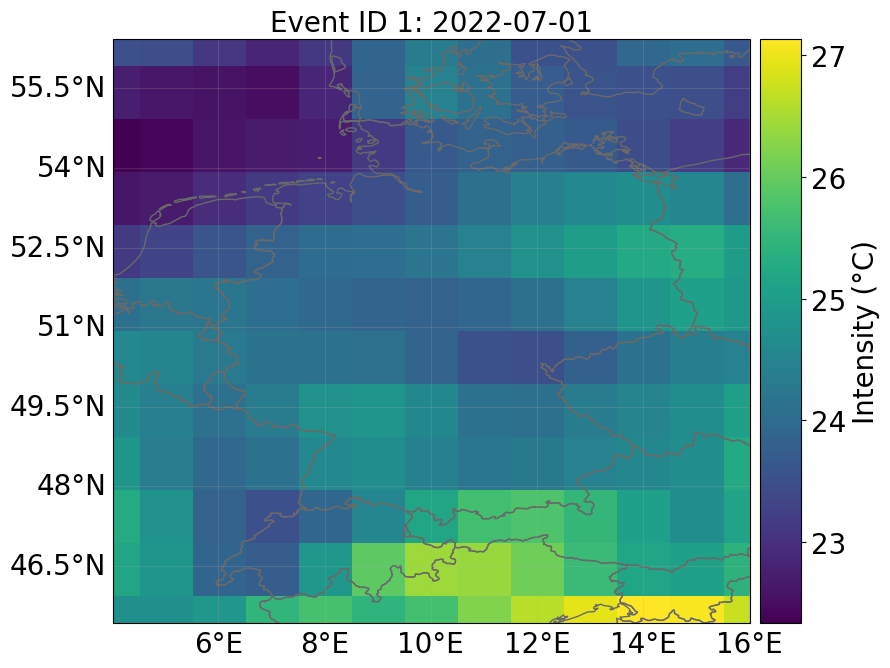

In [8]:
handler.save_index_to_hazard(year_list, month_list, DATA_OUT, tf_index)